<a href="https://colab.research.google.com/github/dzikrafatahillah/Loan_Customer-Analysis/blob/main/AhmadDzikra_Homework_RTC_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Ahmad Dzikra Fatahillah

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
plt.show()

# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

df_dataset=pd.read_csv('gdrive/My Drive/loan_customer.csv')
df_dataset.info()
df_dataset.head()

Mounted at /content/gdrive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-nu

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE


In [ ]:
#df_dataset = pd.read_csv('loan_customer (1).csv')
#df_dataset.info()
#df_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE


# Data Cleansing

## Handling missing values

In [ ]:
df_dataset.isna().sum()

loan_id                 0
birth_date             49
phone_number           52
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64

In [ ]:
df_dataset['applicant_income'].mean()

5681.549019607844

In [ ]:
df_dataset.loc[:,'applicant_income'].fillna(df_dataset['applicant_income'].mean())

0      5849.0
1      4583.0
2      3000.0
3      2583.0
4      6000.0
        ...  
616    2900.0
617    4106.0
618    8072.0
619    7583.0
620    4583.0
Name: applicant_income, Length: 621, dtype: float64

In [ ]:
df_dataset.loc[:,'applicant_income']=df_dataset.loc[:,'applicant_income'].fillna(df_dataset['applicant_income'].mean())
df_dataset.isna().sum()

loan_id                 0
birth_date             49
phone_number           52
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        0
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64

In [ ]:
df_dataset.columns

Index(['loan_id', 'birth_date', 'phone_number', 'gender', 'married',
       'dependents', 'education', 'self_employed', 'applicant_income',
       'coapplicant_income', 'loan_amount', 'loan_term_month',
       'loan_term_year', 'credit_history', 'has_credit_card', 'property_type',
       'loan_status'],
      dtype='object')

In [ ]:
df_dataset[~df_dataset[['loan_id', 'birth_date', 'phone_number', 'gender', 'married',
       'dependents', 'education', 'self_employed', 'applicant_income',
       'coapplicant_income', 'loan_amount', 'loan_term_month',
       'loan_term_year', 'credit_history','property_type',
       'loan_status']].isna().any(axis=1)].isna().sum()

loan_id                 0
birth_date              0
phone_number            0
gender                  0
married                 0
dependents              0
education               0
self_employed           0
applicant_income        0
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history          0
has_credit_card       388
property_type           0
loan_status             0
dtype: int64

In [ ]:
df_dataset=df_dataset[~df_dataset[['loan_id', 'birth_date', 'phone_number', 'gender', 'married',
       'dependents', 'education', 'self_employed', 'applicant_income',
       'coapplicant_income', 'loan_amount', 'loan_term_month',
       'loan_term_year', 'credit_history', 'property_type',
       'loan_status']].isna().any(axis=1)]

In [ ]:
df_dataset.isna().sum()

loan_id                 0
birth_date              0
phone_number            0
gender                  0
married                 0
dependents              0
education               0
self_employed           0
applicant_income        0
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history          0
has_credit_card       388
property_type           0
loan_status             0
dtype: int64

## Handling duplicated data

In [ ]:
print(df_dataset.duplicated().sum())
df_dataset.drop_duplicates(inplace=True)
print(df_dataset.duplicated().sum())

1
0


## Handling Outlier

In [ ]:
print(f'Jumlah data outlier sebelum filter outlier: {len(df_dataset)}')

for col in ['coapplicant_income','applicant_income', 'loan_amount', 'loan_term_month','loan_term_year','credit_history']:
  Q1=df_dataset[col].quantile(0.25)
  Q3=df_dataset[col].quantile(0.75)
  IQR=Q3-Q1
  low_limit=Q1- 1.5*IQR
  high_limit=Q3+ 1.5*IQR
  df_dataset=df_dataset[(df_dataset[col]>=low_limit) & (df_dataset[col]<=high_limit)]

print(f'Jumlah data outlier setelah filter outlier: {len(df_dataset)}')

Jumlah data outlier sebelum filter outlier: 440
Jumlah data outlier setelah filter outlier: 275


## Feature Encoding

In [ ]:
df_dataset.info()
df_dataset.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275 entries, 0 to 619
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             275 non-null    object 
 1   birth_date          275 non-null    object 
 2   phone_number        275 non-null    float64
 3   gender              275 non-null    object 
 4   married             275 non-null    object 
 5   dependents          275 non-null    object 
 6   education           275 non-null    object 
 7   self_employed       275 non-null    object 
 8   applicant_income    275 non-null    float64
 9   coapplicant_income  275 non-null    float64
 10  loan_amount         275 non-null    int64  
 11  loan_term_month     275 non-null    int64  
 12  loan_term_year      275 non-null    int64  
 13  credit_history      275 non-null    float64
 14  has_credit_card     37 non-null     object 
 15  property_type       275 non-null    object 
 16  loan_sta

Index(['loan_id', 'birth_date', 'phone_number', 'gender', 'married',
       'dependents', 'education', 'self_employed', 'applicant_income',
       'coapplicant_income', 'loan_amount', 'loan_term_month',
       'loan_term_year', 'credit_history', 'has_credit_card', 'property_type',
       'loan_status'],
      dtype='object')

In [ ]:
num=['phone_number','applicant_income','coapplicant_income','loan_amount', 'loan_term_month','loan_term_year','credit_history']
cats=['gender','married','dependents','education','self_employed','has_credit_card','property_type','loan_status']
for col in cats:
  print(f'value counts of column {col}')
  print(df_dataset[col].value_counts())
  print('---'*10, '\n') #\n is enter, -*10 is strip line

value counts of column gender
Male      226
Female     49
Name: gender, dtype: int64
------------------------------ 

value counts of column married
Yes    170
No     105
Name: married, dtype: int64
------------------------------ 

value counts of column dependents
0     169
2      47
1      44
3+     15
Name: dependents, dtype: int64
------------------------------ 

value counts of column education
Graduate        216
Not Graduate     59
Name: education, dtype: int64
------------------------------ 

value counts of column self_employed
No     245
Yes     30
Name: self_employed, dtype: int64
------------------------------ 

value counts of column has_credit_card
no     22
yes    15
Name: has_credit_card, dtype: int64
------------------------------ 

value counts of column property_type
apartment    113
studio        82
house         80
Name: property_type, dtype: int64
------------------------------ 

value counts of column loan_status
APPROVE    230
REJECT      45
Name: loan_status, d

In [ ]:
#label encoding
#mapping_gender= {'Female':0,'Male':1}
#mapping_married= {'No':0,'Yes':1}
mapping_education= {'Graduate':1,'Not Graduate':0}
mapping_self_employed= {'Yes':1,'No':0}
mapping_has_credit_card= {'yes':1,'no':0}
mapping_loan_status= {'APPROVE':1,'REJECT':0}

#df_dataset['gender']=df_dataset['gender'].map(mapping_gender)
#df_dataset['married']=df_dataset['married'].map(mapping_married)
df_dataset['education']=df_dataset['education'].map(mapping_education)
df_dataset['self_employed']=df_dataset['self_employed'].map(mapping_self_employed)
df_dataset['has_credit_card']=df_dataset['has_credit_card'].map(mapping_has_credit_card)
df_dataset['loan_status']=df_dataset['loan_status'].map(mapping_loan_status)

In [ ]:
for cats in ['dependents','property_type']:
    onehots = pd.get_dummies(df_dataset[cats], prefix=cats)
    df_dataset=df_dataset.join(onehots)

In [ ]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275 entries, 0 to 619
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_id                  275 non-null    object 
 1   birth_date               275 non-null    object 
 2   phone_number             275 non-null    float64
 3   gender                   275 non-null    object 
 4   married                  275 non-null    object 
 5   dependents               275 non-null    object 
 6   education                275 non-null    int64  
 7   self_employed            275 non-null    int64  
 8   applicant_income         275 non-null    float64
 9   coapplicant_income       275 non-null    float64
 10  loan_amount              275 non-null    int64  
 11  loan_term_month          275 non-null    int64  
 12  loan_term_year           275 non-null    int64  
 13  credit_history           275 non-null    float64
 14  has_credit_card          3

In [ ]:
y=df_dataset.groupby('gender').sum()
print(y[['property_type_apartment','property_type_house','property_type_studio']])


        property_type_apartment  property_type_house  property_type_studio
gender                                                                    
Female                       24                   10                    15
Male                         89                   70                    67


In [ ]:
dz=y[['property_type_apartment','property_type_house','property_type_studio']].copy()
dz=dz.reset_index()
dz

,gender,property_type_apartment,property_type_house,property_type_studio
0,Female,24,10,15
1,Male,89,70,67


In [ ]:
pd.melt(dz, id_vars=['gender'])
dx=pd.melt(dz, id_vars=['gender'])

In [ ]:
dx

,gender,variable,value
0,Female,property_type_apartment,24
1,Male,property_type_apartment,89
2,Female,property_type_house,10
3,Male,property_type_house,70
4,Female,property_type_studio,15
5,Male,property_type_studio,67


In [ ]:
x=[['property_type_apartment','property_type_house','property_type_studio']]
print(x)

[['property_type_apartment', 'property_type_house', 'property_type_studio']]


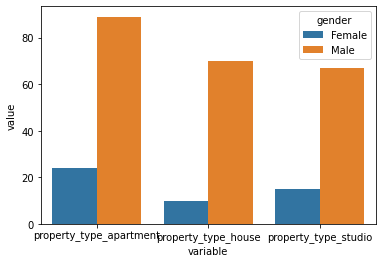

In [ ]:
sns.barplot(data=dx, x="variable", y="value", hue="gender")

ValueError: ignored

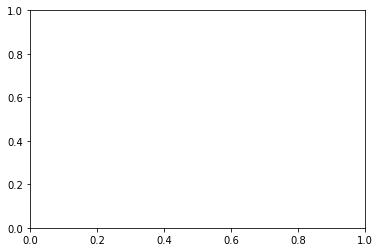

In [ ]:
plt.bar(slebew,gender,width=0.4)

plt.xlabel('Jenis Data')
plt.ylabel('Jumlah')
plt.title('Perbandingan Jumlah Hutang dan Tipe Property pada Laki-laki dan perempuan')

# Business Insight

## Analisis minat pelanggan berdasarkan pada tipe properti

## Analisis pengaruh status perkawinan terhadap jangka waktu meminjam 